In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from konlpy.tag import *

m = Mecab(dicpath = 'C:/mecab/mecab-ko-dic')

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
data = pd.read_csv('C:/Users/songy/Desktop/Data/sentiment_data/travel_adaptor_reivew_pp.csv', index_col = 0)

In [4]:
# tokenized_sentence의 결과가 NaN으로 책정되는 case 발생 > 결과값 불러올 떄 발생?????? 왜?
data[data['tokenized_sentence'].isna()]

# 원문 있을 경우 tokenized_sentence 반영 
data['tokenized_sentence'] = data.apply(lambda x: x['content_lst'] if pd.isna(x['tokenized_sentence']) else x['tokenized_sentence'], axis=1)

# 원문, 토큰화된 문장 NaN일 경우 삭제
data.dropna(inplace=True)

In [5]:
def replace_text(text):
  text = str(text)
  text = text.replace('좋아용', '좋아요')
  text = text.replace('굿국국숙','굿')
  text = text.replace('goood','굿')
  text = text.replace('꿋꿋입니다','굿')
  text = text.replace('굿입디다','굿')
  text = text.replace('굿입니다','굿')
  text = text.replace('bbb','굿')
  text = text.replace('굿굿', '굿')
  text = text.replace('굿굿굿', '굿')
  text = text.replace('굿굿굿굿', '굿')
  text = text.replace('나이스', '굿')
  text = text.replace('잘 되네요', '잘되다')
  text = text.replace('잘 작동됩니다', '잘되다')
  text = text.replace('잘 됩니다', '잘되다')
  text = text.replace('강추합니다', '강추입니다')
  text = text.replace('이거만 한', '이만한')
  text = text.replace('이거만한', '이만한')
  text = text.replace('여기만한', '이만한')
  text = text.replace('의심하지 않아요', '의심은 없어요')
  text = text.replace('마음에 듭니다', '마음에들어요')
  text = text.replace('이뿌요', '이뻐요')
  text = text.replace('잘 되', '잘되어')
  text = text.replace('잘되네요', '잘되어요')
  text = text.replace('힘듭니다', '힘들어요')
  text = text.replace('맘에', '마음에')
  text = text.replace('저령', '저렴')
  text = text.replace('ㅈㅔ발', '제발')
  text = text.replace('괘안요', '괜찮아요')
  text = text.replace('괜춘', '괜찮아요')
  text = text.replace('딱 이에요', '딱이다')
  text = text.replace('딱 ', '딱')
  text = text.replace('민족', '만족')
  text = text.replace('미객', '미백')
  text = text.replace('득템', '득탬')
  text = text.replace('잘됩니다', '잘되다')
  text = text.replace('잘 됩니다', '잘되다')
  text = text.replace('잘되요', '잘되다')
  text = text.replace('잘 돼요', '잘되다')
  text = text.replace('잘 되네요', '잘되다')
  text = text.replace('잘 안 됩니다', '잘 안되다')
  text = text.replace('잘 안되요', '잘 안되다')
  text = text.replace('잘 안돼요', '잘 안되다')
  text = text.replace('돈값 하네요', '돈값 합니다')
  text = text.replace('신 세계', '신세계')
  text = text.replace('왜 안 사세요', '추천')
  text = text.replace('이거 사세요', '추천')
  text = text.replace('구매 하세요', '구매하세요')
  text = text.replace('구매하세요', '추천')
  text = text.replace('그냥 사세요', '추천')
  text = text.replace('부담이 없어요', '부담없어요')
  text = text.replace('가렵더라구요', '가렵다')
  text = text.replace('가려워요', '가렵다')
  text = text.replace('겁나', '진짜')
  text = text.replace('장난이 아니네요', '장난 아니네요')
  text = text.replace('장난아니네요', '장난 아니네요')
  text = text.replace('나쁘지않', '나쁘지 않')
  return text

data['content_lst'] = data['content_lst'].apply(replace_text)

In [6]:
keywords = ['샀어요', '샀네요']

common_entity = ['배송','프로모션', '가격', '가성비', '싼값', '구매', '재구매','포장','판매','저렴','할인','촉진','AS', '문의', '답변','상담']

entity = ['중량','색상', '색깔', '색', '디자인', '무게','사이즈','크기','성능','속도','퀄리티','모양','수명','안전성','휴대','콤팩트','만능',
          '사용성', '사용감','호환', '품질','스펙','견고','영구','기능','구성', 'KC', '인증']


keywords_patterns = '|'.join(keywords)
common_entity_patterns = '|'.join(common_entity)
entity_patterns = '|'.join(entity)

data.loc[(data['repeated_final']==0) &
        (data['content_lst'].str.contains(keywords_patterns, na=False)) &
        (~data['content_lst'].str.contains(common_entity_patterns, na=False)) &
        (~data['content_lst'].str.contains(entity_patterns, na=False)) &
        (data['content_lst'].str.len()<=28),"review_type"]="simple"

data.loc[(data['repeated_final']==0) &
        (data['content_lst'].str.contains(keywords_patterns, na=False)) &
        (~data['content_lst'].str.contains(common_entity_patterns, na=False)) &
        (~data['content_lst'].str.contains(entity_patterns, na=False)),"review_type"]="simple"

data.loc[(data['repeated_final']==0) &
        # (pad['kss_split_text'].str.contains(keywords_patterns, na=False)) &
        (~data['content_lst'].str.contains(common_entity_patterns, na=False)) &
        (~data['content_lst'].str.contains(entity_patterns, na=False)) &
        (data['content_lst'].str.len()<=7),"review_type"]="simple"

In [7]:
#data.drop(columns='Unnamed: 0', inplace=True)

In [8]:
general = data[data['review_type'] == 'general']

In [9]:
# 중간 처리 과정에서 tokenized_sentence에 결측값 있을 경우 재처리 (앞으로 보냄)
#general['tokenized_sentence'] = general.apply(lambda x: x['content_lst'] if pd.isna(x['tokenized_sentence']) else x['tokenized_sentence'], axis=1)

In [10]:
def compiled_morphs_total(texts, stopwords_path, additional_stopwords=[]):
    # 불용어 파일 로드
    with open(stopwords_path, encoding='utf-8') as file:
        stopwords = file.read().splitlines()
    
    # 추가 불용어 합치기
    stopwords.extend(additional_stopwords)
    
    # 리뷰 전처리
    clean = re.sub(r'[-=+,#/\?:^$.@*"※~&%ㆍ!』\\‘·|\(\)\[\]\<\>`\'…\"\“’]', '', texts)
    clean = clean.replace('\n', '').replace('\r', '')  # 줄바꿈 문자 제거
    
    # 형태소 분석기
    # m = Mecab(dicpath='C:/mecab/mecab-ko-dic')  # Mecab 경로 설정 (Windows 환경에서 사용)
    okt = Okt()

    # 형태소 추출 시 어간으로 추출
    tokens = okt.morphs(clean, stem = True)
    tokens = [word for word in tokens if word not in stopwords]
    
    return tokens

In [11]:
def str_to_list(text):
    if isinstance(text, str):
        try:
            return eval(text)
        except:
            return text
    return text

general['tokenized_sentence'] = general['tokenized_sentence'].apply(str_to_list)

In [12]:
# 토큰화된 문장이 아예 NaN값이 있어서 해당 부분만 변경

#general.at[5276, 'tokenized_sentence'] == '너무 좋아요 배송도 빠르고'
#general.at[6143, 'tokenized_sentence'] == '사이즈 딱입니다 배송도 빠르고'

In [13]:
# texts = product['add_rule_based_split_review']  # 리뷰 데이터
stopwords_path = "C:/Users/songy/Desktop/Data/stopwords-ko.txt"
additional_stopwords = ['가', '가격', '가운데', '가족', '간', '감', '감비', '값', '같고', '같습니다', '같아', '같아서', '같아요', '겉',
                        '같은', '결제', '같은데', '개', '거', '거랑', '검색', '것', '겉', '게', '게요', '결과', '결재', '경우', '고', '금액', '차이',
                        '고려', '고만', '고민', '곳', '과', '구리고', '구매', '구매평', '구비', '구성', '구입', '군더더기',
                        '글', '급하게', '기대', '기존', '기준', '길', '김기', '깊질', '까지', '끝', '나라', '나중', '날', '남편',
                        '냐짱', '너무', '네이버', '노브', '눈', '느낌','는', '다', '다르게', '다르고', '다양', '다이소', '달',
                        '담', '답변', '대부분', '대비', '대신', '덕분', '덜렁', '도', '도착', '돈', '동봉', '동생', '동일', '돼다', '되다',
                        '되어다', '두면', '뒤', '들', '등', '디', '딸', '때', '땡', '라', '라고', '래빗', '레이', '로',
                        '를', '리뷰', '마', '마련', '마음', '만', '많고', '많아서', '많았었', '많지만', '말', '맘', '맛', '멀티',
                        '멜리', '면', '못', '무료', '문', '문제', '물', '물건', '미', '및', '밑', '며칠', '바이', '박스', '반', '받다',
                        '발', '발송', '배', '배송', '번', '번개', '벽', '변', '별도', '별점', '보관', '복', '봉', '부분', '브레',
                        '비선', '빌', '사나', '사서', '사실', '사요', '사용', '사장', '사진', '생각', '서', '선물', '선택',
                        '설치', '세상', '쇼퍼', '숍', '수', '숙소', '스타', '스티커', '스펙', '시', '시기', '시대', '시험', '신랑',
                        '신행', '실사', '실사용자', '싸게', '싸는데', '싸진', '쌀', '써다', '쏙', '쓸모', '아들', '아무것',
                        '아주', '아직', '안', '않다', '알차게', '앞', '애', '야지', '얇아요', '얘기', '어머니', '언니', '언스', '엄마', '에', '에서', '엔', '엔코',
                        '여분', '여유', '역할', '연락', '연휴', '옆', '예비', '예전', '옛날', '오다', '오랫동안', '오전', '오케이', '오후',
                        '와', '와이프', '요', '요새', '요즘', '용', '운', '워홀', '원', '원래', '으로', '은', '을', '의',
                        '이', '이거', '이다', '이라', '이랑', '이번', '이외', '이용', '이유', '이전', '인', '인터넷', '일행', '있고', '있군요',
                        '있긴', '있네요', '있는', '있는대도', '있다', '있다는', '있던데', '있어', '있어서', '있었', '있을', '있지만', '자', '자다', '자체',
                        '잔', '잘', '장만', '잦은데', '저번', '전', '전용', '전이', '전체', '점', '정', '정도', '제', '제공',
                        '제품', '종결', '종류', '주',
                        '주니', '주문', '주파', '준비', '지난번', '지네', '지원', '지인', '집', '차', '차지', '처리', '처음', '첨부',
                        '추후', '출국', '출장', '친구', '커피', '코', '크게', '크지','테스트', '퇴원', '튀', '트',
                        '티', '판매', '평', '평생', '포장', '포함', '표', '프리', '필', '하고', '이거',
                        '하다', '하머', '하우스', '한', '한국', '한큐', '해', '형', '호텔', '확인', '활용', '회사', '효', '후', '후기', '같', '없', '목', '높은',
                        '흠', '히', '힘', '하루', '있', '가능', '음',  '단', '역시', '해외', '여행', '어댑터',
                        '배변', '패드', '요요', '성비', '위', '질', '이것저것', '막', '재재', '아조', '보통', '평소', '이후', '정기', '울', '량', '단골', '계속', '포', '여기저기',
                        '이틀', '지금','뒷면', '참고', '푸', '첨', '다둥', '갑', '패', '한동안', '완전', 'ㄴ', '조', '숯', '킹스',
                        '멍멍이', '향도', '가성', '앞뒤', '사이', '방', '코코', '이름', '최근', '딘', 'ㄱ', '짜리', '비', '급', '드', '중', '한쪽', '쥐', '작년', '룸', '송', '사면',
                        '견이', '남자', '불가', '갈기', '말티', '제일', '속', '솜', '별', '미만', '고요', '요귀', 'ㄷ', '선비', '수컷', '초대', 'ㅣ', '쏘', '럭', '오늘', '오랜만',
                        '아지', '무리', '낮', '인생', '기', '껍지', '최소', '중대', '옹', '여자', '탓', 'ㅂ', '귀퉁이', '스피츠', '덕', '조타', '국민', '남', '톱', '품', '독',
                        '왼쪽', '오른쪽', '강', '만점', '진작', '내용', '깔', '플로', '근처', '임', '초코', '조음', '세로', '성', '사도', '묘', '댁', '미세', '쇼핑', '전화', '탑',
                        '답', '상세', '빅', '후원', '바깥', '프렌치', '덩', '여아', '치', '지', '대', '쟁', '펠', '렛', '갱', '제격', '역', '둥이', '절', '실', '습수', '멈', '겨',
                        '가설비', '족', '적', '신문지', '회용', '믹', '페스', '워', '이대로', '반년', '응아', '밧', '현상', '방법', '홈', '숩', '반복', '도통', '이코노미', '새요',
                        '셉', '인향', '중자', '최', '수력', '액', '시중', '뒤처리', '바도', '콩', '짐', '장당', 'ㅁ', '평균', '이동', '구요', '말모', '사니', '여러', '유',
                        '중임', '아진', '장모', '매합', '완료', '한참', '해당', '감안', '명', '역대', '찜', '믈', '통', '몽이', '향상', '샙', '꼬미', '밤중', '포미',
                        '뎅이', '여요', '고생', '문자', '반나절', '대용', '녀', '요조', '아요', '반경', '팬', '쉬만', '시도', '렴', '생가', '감도', '우', '자요', '암', '후론',
                        '루루', '은근', '좃', '띠', '저령', '뉴', '항사', '귀양', '붐', '펄프', '노모', '이쪽저쪽', '세장', '뮨', '규', '꼴', '파드', '니노', '괴안', '슈', '우타다',
                        '주세', '시야', '희', '뚱', '씨', '잴', '실례', '앒', '와중', '끝판', '추', '견지', '요배', '낫', '동', '에다', '조앙', '스탠', '세지', '연', '니더', '바', '닽',
                        '양이', '글쎄', '사본', '단독', '쓰봉', '친정집', '김', '치와', '슈거', '느', '토이', '특이', '방치', '군', '욕', '루피', '지에', '흘', '부', '견응', '살짝', '개아들',
                        '텨', '듄', '이하', '앝', '아용', '주말', '턱', '다뇨', '알', '상', '넝', '쪼끔', '야기', '직', '붕가', '쥬', '외', '서오', '아디', '로뎀', '젖', '덧', '현재', '번창', '작', '항', '불', '적정',
                        '안세', '소자', '시판', '끝단', '어림', '냄', '서요', '위주', '깔개', '업장', '내외', '울대', '주위', '찰스', '버드맨', '칭', '베리', '푹신', '삿', '대응', '논의', '경', '국',
                        '소취', '산', '밤새', '마린', '임도', '개모', '디즈', '팝', '슈퍼', '립니', '특유', '다회', '곳곳', '파', '대소', '쏭', '순식간', '줌', '깜놀', '진심', '동공', '치곤', '후손',
                        '로랑', '형성', '토모', '땅', '약형', '동군', '여기사', '뚜', '룡', '조그', '일쑤', '강주', '척', '겐', '뚜꾸', '하마', '둔갑', '수매', '겡', '해영', '러버', '대로', '습기', '쉽',
                        '루', '고중', '긑', '우니', '낙', '넉', '기니', '화요일', '개딸', '재결', '날강도', '목요일', '월요일', '땜질', '야간', '이해', '판위', '장여', '커크', '랜', '도라', '재근', '호도',
                        '샌', '파파', '외각', '쿠거', '몽중', '양도', '개놈', '가이', '대피', '장실', '고령', '일곡', '감이', '만자문', '적격', '길거리', '덩이', '선방', '키런', '햄', '께랑', '개론', '램', '와이오밍',
                        '완존', '타비', '찰', '잡잡', '요아', '나오', '어감', '홍시', '두마', '산이', '키우', '쥐똥', '달견', '부들', '부실', '징', '둡', '밀리지', '구람', '어치', '큰딸', '초아',
                        '텐', '저당', '쉼', '휠', '견반', '거려', '제로', '예견', '역쉬', '항인', '별전', '유어', '듀야', '유야', '유라', '오야', '엉', '쟁기', '밸', '용허', '죠', '누질', '잇', '정에', '간혼',
                        '조조', '오조', '지정', '장호', '굽', '보타', '우고', '보꾹', '시키', '수놈', '곁', '양정', '불량아', '소홀', '우거', '꽁', '숫', '닼', '난사', '욤', '수개월', '롱이', '성경', '임료', '요구',
                        '줄장', '쓰래', '대몽', '잭', '사항', '거유', '계족', '둠', '과찬', '아서', '편이', '벌', '당사', '개더', '애요', '번차', '납', '라주', '솧', '일회', '테', '바야', '엠', '다도', '요개', '봄', '가을',
                        '애장', '고고씽', '버', '비로', '대기', '그럭', '땡땡이', '강선', '스키', '버논', '비가', '거짓', '대요', '호오', '저초', '야호', '비축', '진전', '진리', '긴말', '미고', '두아', '타우', '왕따', '꺼만',
                        '두기', '항거', '짤짤이', '삽', '돌아악', '영역', '보름', '도중', '私', '房', '菜', '美', '아즈', '셀리', '옌', '버리', '휴지통', '매년', '안방', '쓰개', '깡깡이', '미미', '이리리', '비비',
                        '디디', '션', '노드', '몽', '홀', '점입', '콜', '자우', '어래', '누나야', '룬', '어류', '차선', '토리', '금대', '리치', '니즈', '절지', '개로신', '미안', '레트', '수별', '번갈',
                        '드로', '가스', '가송', '비갑', '유니참', '계', '안성', '긔', '애고', '강순', '시예', '시위', '중화', '문가', '거어', '려', '함', '익만', '승수', '두품', '극', '시쟁', '기격구', '담날',
                        '유랑', '가계', '거보', '먹', '우씨', '시바', '요일', '중닭', '시골집', '방생', '모카', '거미', '떨기', '해유', '뱃', '샅', '아누', '아영', '턴', '몰리', '스', '농수', '산집', '이란', '세보', '하소연', '제구',
                        '보대', '세뇨', '도꾸', '소모량', '빈', '예시', '동급', '참조', '변환', '졸리', '래브라도', '싱', '물가고', '녕', '가드', '짝', '사여', '소성', '거도', '사유', '상기', '지라', '담부', '대건', '미흡', '샵',
                        '저주', '폭탄', '살', '용굿', '검', '저어', '않', '이상일', '깜장', '피', '광증', '조코', '안뜸', '마나', '골', '까치', '셔', '애덕', '바이바이', '돗돔', '여타', '휘', '금새', '곡', '잎', '이즈라', '조기', '이길만',
                        '범', '야옹이', '비론', '톰', '제때', '똘', '도툼', '조야', '촉', '매기', '종전', '가량', '이대', '판티', '갗', '시량', '당량', '시미', '움', '소용', '톡', '용양', '약시', '병', '두깨', '재문', '서두', '피츠', '필도', '방기',
                        '사수', '불리', '자신감', '뒤편', '쌍', '이재', '막지', '따님', '규조토', '티즈', '보', '농', '계임', '난중', '러그', '밝은색', '로럴', '젤', '하항', '상쓰', '궁', '향이', '아드', '대왕', '소영', '선정', '소지', '종가',
                        '기원', '오래간만', '특수', '개춘', '기라', '보동', '앞쪽', '깃', '표정', '샆', '재탕', '증발', '정성', '론', '갱지', '네요', '라다', '얄','염용', '뜸', '자류', '가디', '견분', '발도', '장꽝', '샤', '비위', '의견',
                        '리', '주무', '시바이', '액셀', '곡산', '종로', '봉사', '숳', '구예', '요령', '즈', '몰기', '보거', '래', '한물', '에소', '망사', '의촉', '공함', '뉴뉴', '패두', '쥴', '애벌빨래', '애용품', '전거', '반련', '견제', '시일',
                        '수록', '페트', '츠', '아가야', '재그', '도치', '양견', '서리', '버디', '쿠싱', '맘마', '베베', '페페', '공', '출근길', '잠', '개당', '하주', '개도', '배번', '시퍼', '사세', '변태', '직사각', '사열', '건승', '이력', '교',
                        '승부', '복고', '입소', '모랑', '바요', '탐', '광', '낌', '타가', '문턱', '태무', '무시', '모자람', '문란', '경양', '여럿', '기판', '대서', '광색', '말캉', '아간', '이먼', '개의', '이강', '오공', '귀염둥이',
                        '지독', '변양', '존망', '그간', '모도', '셀', '소라지', '아버님', '죄', '매달', '민공', '어멈', '부스럼', '최저', '본지', '갑오', '브', '재자', '페트로', '끈끈이', '백패', '그제', '모에', '수문', '마은', '가섭', '큐',
                        '엇청', '피피', '군요', '본론', '로러', '오노', '이이', '뚱뚱이', '뚝', '몬스터', '곰팡', '와부', '확연', '퍼스트', '세미', '리라', '평일', '모레나', '라이', '력', '벗', '용용', '개재', '북송', '개코', '두던', '하루치',
                        '볕', '재거', '지난달', '색이', '로지', '줄', '화', '저반', '자마', '대오', '리프', '견초', '보디', '테일', '겹', '세', '려고', '버니', '데이', '대다수', '세어', '하번', '교하', '긁', '롬', '반낭',
                        '범벅', '자죽', '자선', '무조', '정직', '배변패드', '청소기', '무선', '마스크팩', '메디', '힐', '마스크', '팩',
                        '입', '존', '테스', '반품', '택배', '사둔', '수어', '천도', '물놀', '제기', '편', '녹', '어머님', '쑥국', '시어머니', '오크', '밀', '룰루', '룰', '엘레', '딩', '딸내미', '장',  '깡', '컷', '적리', '네영', '이모', '당',
                        '입진', '통도', '워너', '비즈', '틱', '머서', '주수', '입어', '교환',
                        '여깁니다', '밤사이','텐데요','나머진', '이걸로','김성윤','가규','리쥬','처','전반','리더스더마픽스','더블유','베토벤','엄청','잔느식스헬로케어팩','액비','이모','아저씨','아비브','덩어리','자음생','조리원','기분전환','사보','메르비',
                        '사시','인감','특정','눈앞','아들딸','중반','아리디','딸애','눈두덩','편','탈','거짓말','순수크린','직전','생김','협찬','닥터웰메이드','서우콜라겐','히터','서우','골드핏마스크','선호','유학길','목표','자취','게으름뱅이','야대',
                        '점도','선두','리머','올해','미래','능','일향','일대','뭉텅이','한상','업무상','대면','취업','계획','무지한','불혹','면에','자용','부부','엡','핍','겇','올케언니','별말','남학생','무공','서함','들통','로로스키니','다회차','내용품',
                        '봄여름','슥','자부','원위치','수정','님','셀카','핑','디엠','해선','용재','확대','사모','조아지','경찹','서랍','살점','발해','런지','테앵','잇기','페리홉','친언니','연습','하녀','코이','코나','한나절','마리오네트','무척','그럽','요즈음',
                        '예랑','심부','낼','소꿉친구','미련','헤거','예인','알가','메트','리콜','케비아','에르메스','실감','약감','활','사바','과도','태한','부지','프로셀','쐐','아오','쯤','맡','렁','후애','자면','아크','짜도','우와','둥','당연','놀','시댁',
                        '피몽','쉐','시어머니','실현','앞전','미남','데카','소사','이드','앙몽','듸','삭','개안','소테','쪼금','기어','개개','골짝','피프','피코','허신','취소','센타','밈','감고','샤프','이만저만','항구','이브','가금','착면','우태',
                        '덕선','선라','사합','키','튜','하나하나','직접','파티션','챙','거가','러플','접이','탕요','바케','바흐','파하','앆','구매','착시','넉지','율','알뜰','건몰','태산','지사장','임박','적지','주차','바림','지와','바보','다라',
                        '서진','스콜라','나만','식','연애','유정','재현','마이드','아기씨','재구','매입','비부','긷','야근','틈','헬로','고행','쟌느','가농','발처','인심','토털','게유','들보','비티','카구','숭','힌','타애','애너','우아','누우','투타','숙부',
                        '쟁두','무네','이상무','효가','방판','최신','최초','의지','확','악','절반','러너','다로','찬','헵','고영','순']

# 문자열 여부를 체크하고, None 또는 다른 타입의 값이 있을 경우 빈 문자열로 처리
# general['morphs'] = general['tokenized_sentence'].apply(lambda texts: compiled_morphs(str(texts), stopwords_path, additional_stopwords) if isinstance(texts, str) else [])
# general['morphs_2'] = general['tokenized_sentence'].apply(lambda texts: compiled_morphs_total(str(texts), stopwords_path, additional_stopwords) if isinstance(texts, str) else [])
general['morphs'] = general['tokenized_sentence'].apply(lambda texts: compiled_morphs_total(str(texts), stopwords_path, additional_stopwords) if isinstance(texts, str) else [])

In [14]:
def list_convert_comma(lst):
    return ', '.join(lst)

def list_convert_space(lst):
    return ''.join(lst)

In [15]:
# general['Tokenized_morphs_list'] = general['morphs'].apply(list_convert_comma)
# general['Tokenized_morphs'] = general['Tokenized_morphs_list'].apply(list_convert_space)
# general.head(3)

general['Tokenized_morphs_list'] = general['morphs'].apply(list_convert_comma)
general.head(3)

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list
3,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240716,5,돈 추가해서 구매하는 게 더 좋네요 금액 차이 얼마 안 나는데 기능은 더 좋아요,44,0,general,돈 추가해서 구매하는 게 더 좋네요,service,"[추가, 더, 좋다]","추가, 더, 좋다"
3,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240716,5,돈 추가해서 구매하는 게 더 좋네요 금액 차이 얼마 안 나는데 기능은 더 좋아요,44,0,general,금액 차이 얼마 안 나는데 기능은 더 좋아요,service,"[나다, 기능, 더, 좋다]","나다, 기능, 더, 좋다"
6,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240714,5,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,26,0,general,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,product,"[콤팩트, 디자인, 실용, 높다, 주다]","콤팩트, 디자인, 실용, 높다, 주다"


In [16]:
sentiword_dic = pd.read_csv("C:/Users/songy/Desktop/Data/sentiment_data/KNU_dictionary/sentiment_dictionary.csv", index_col = 0)
sentiword_dic

,word,word_root,polarity
0,(-;,(,1
1,(;_;),(;_;),-1
2,(^^),(^^),1
3,(^-^),(^-^),1
4,(^^*,(,1
...,...,...,...
14903,촉촉,촉촉,2
14904,뽀송,뽀송,2
14905,찢어지다,찢어지다,-1
14906,구기다,구기다,-1


In [17]:
def m_sentiment_score(morphs):
    p_v=[]
    for morph in morphs:
        match = sentiword_dic[(sentiword_dic['word']==morph)]
        if not match.empty:
            p_v.append(match['polarity'].values[0])
    return sum(p_v)

def return_morph_in_dict(morphs):
    p_m = []
    for morph in morphs:
        match = sentiword_dic[(sentiword_dic['word']==morph)]
        if not match.empty:
            p_m.append(match['word'].values[0])
    return p_m

In [18]:
general['match_dic'] = general['morphs'].apply(return_morph_in_dict)
general['polarity'] = general['morphs'].apply(m_sentiment_score)

In [19]:
general.head(3)

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity
3,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240716,5,돈 추가해서 구매하는 게 더 좋네요 금액 차이 얼마 안 나는데 기능은 더 좋아요,44,0,general,돈 추가해서 구매하는 게 더 좋네요,service,"[추가, 더, 좋다]","추가, 더, 좋다",[좋다],2
3,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240716,5,돈 추가해서 구매하는 게 더 좋네요 금액 차이 얼마 안 나는데 기능은 더 좋아요,44,0,general,금액 차이 얼마 안 나는데 기능은 더 좋아요,service,"[나다, 기능, 더, 좋다]","나다, 기능, 더, 좋다",[좋다],2
6,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240714,5,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,26,0,general,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,product,"[콤팩트, 디자인, 실용, 높다, 주다]","콤팩트, 디자인, 실용, 높다, 주다",[높다],1


In [20]:
general.to_csv('C:/Users/songy/Desktop/Data/sentiment_data/refined/adaptor_polarity.csv', encoding='utf-8-sig')

In [21]:
round((general.polarity.value_counts(normalize=True)*100),2).to_frame().reset_index().sort_values(by='polarity', ascending=False).style.background_gradient(axis=None, cmap= sns.light_palette("#2ecc71", as_cmap=True))

,polarity,proportion
19,15,0.010000
18,12,0.010000
16,10,0.020000
15,9,0.020000
11,8,0.210000
12,7,0.160000
8,6,1.120000
7,5,1.250000
3,4,6.790000
4,3,6.630000


In [22]:
print(round(general.polarity.mean(),2))
print(general.polarity.median())

1.24
1.0


### 평점 수정 로직

In [23]:
general = pd.read_csv('C:/Users/songy/Desktop/Data/sentiment_data/refined/adaptor_polarity.csv', index_col=0)

In [24]:
general.head(3)

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity
3,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240716,5,돈 추가해서 구매하는 게 더 좋네요 금액 차이 얼마 안 나는데 기능은 더 좋아요,44,0,general,돈 추가해서 구매하는 게 더 좋네요,service,"['추가', '더', '좋다']","추가, 더, 좋다",['좋다'],2
3,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240716,5,돈 추가해서 구매하는 게 더 좋네요 금액 차이 얼마 안 나는데 기능은 더 좋아요,44,0,general,금액 차이 얼마 안 나는데 기능은 더 좋아요,service,"['나다', '기능', '더', '좋다']","나다, 기능, 더, 좋다",['좋다'],2
6,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240714,5,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,26,0,general,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,product,"['콤팩트', '디자인', '실용', '높다', '주다']","콤팩트, 디자인, 실용, 높다, 주다",['높다'],1


In [25]:
# 원문에서 빼기 대상 (-1점)
subtract_one_lst = ['제대로','뽁뽁이도 없이','쿠션은 없고','스티커도 없고']

# 원문에서 빼기 대상 (-2점)
subtract_lst = ['좋겠어요','가능할 것 같은데','좋으면','사용하지 말라고','과부하','안돼가지고 못썼네요','안 들어가는 부분',
                '저렴하지는 않네요','무거워서', '설명 필요', '잘 안맞']

# 원문에서 빼기 대상 (-3점)
subtract_three_lst = ['타는 냄새']

# 원문에서 추가 대상 (+5점)
add_five_lst = ['번거로움을 덜어줄 뿐 아니라']

# 원문에서 추가 대상 (+3점)
add_three_lst = ['불량이 없길','구매하시고','진작 구매', '나무랄 거 없는', '의심은 없어', '부담없', '걱정없']

# 원문에서 추가 대상 (+2점)
add_lst = ['특이점 없고','문제없으며','고장 없었고','아니니까','걱정할 필요 없','어슬픈','잘 작동','잘 사용',
           '마음에 들어요','이상없이','왕창 사서','고장 없었고','과감하게 사용','꼭 구매','잘 쓰고',
           '잘 썼어요','걱정할 필요 없어요','여러 기능','굿','잘 됩니다','마음에 드네요','덕분에',
           '맞는 파우치','군더더기 없고', '이만한', '터진거없이', '떨어지','떨어져', '떨어질', '진정되는', '만한게 없', 
           '재질이 아니라', '장난 아니', '효과있', '나쁘지 않', '끊을수 없']

# 원문에서 추가 대상 (+1점)
add_one_lst = ['잃어버려서','다이소에는 없길래','급하게','불량 없었으면 좋겠어요','그리워서','많네요','급히',
               '사용을 해볼 수 없지만','이상 없을 거라','잘 구매','잘 왔네요','총알 배송','어디든 사용','문제 없이', '돈값 하네요',
               '기대 이상', '쓸만합니다', '쓸만한', '정직한 상품']

In [26]:
def adjust_polarity(datas, word_lst, n):
    """
    1) datas : rows
    2) word_lst : 룰 적용 리스트
    3) n : 더하거나 뺄 값
    """
    if isinstance(datas['tokenized_sentence'],str):
        if any(word in datas['tokenized_sentence'] for word in word_lst):
            datas['polarity'] += n
    return datas

In [27]:
general = general.apply(adjust_polarity, word_lst=subtract_one_lst, n=-1, axis=1)   # 행 단위로 실행
general = general.apply(adjust_polarity, word_lst=subtract_lst, n=-2, axis=1)
general = general.apply(adjust_polarity, word_lst=subtract_three_lst, n=-3, axis=1)
general = general.apply(adjust_polarity, word_lst=add_five_lst, n=5, axis=1)
general = general.apply(adjust_polarity, word_lst=add_three_lst, n=3, axis=1)
general = general.apply(adjust_polarity, word_lst=add_lst, n=2, axis=1)
general = general.apply(adjust_polarity, word_lst=add_one_lst, n=1, axis=1)
general.head(3)

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity
3,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240716,5,돈 추가해서 구매하는 게 더 좋네요 금액 차이 얼마 안 나는데 기능은 더 좋아요,44,0,general,돈 추가해서 구매하는 게 더 좋네요,service,"['추가', '더', '좋다']","추가, 더, 좋다",['좋다'],2
3,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240716,5,돈 추가해서 구매하는 게 더 좋네요 금액 차이 얼마 안 나는데 기능은 더 좋아요,44,0,general,금액 차이 얼마 안 나는데 기능은 더 좋아요,service,"['나다', '기능', '더', '좋다']","나다, 기능, 더, 좋다",['좋다'],2
6,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240714,5,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,26,0,general,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,product,"['콤팩트', '디자인', '실용', '높다', '주다']","콤팩트, 디자인, 실용, 높다, 주다",['높다'],1


In [28]:
general.to_csv('C:/Users/songy/Desktop/Data/sentiment_data/refined/adaptor_modified_score.csv', encoding='utf-8-sig')

사전 추가 대상 반영하기

In [29]:
# konlpy 설치 경로 확인
import konlpy
print(konlpy.__file__)

c:\Users\songy\anaconda\envs\mecab\lib\site-packages\konlpy\__init__.py


konlpy> java > open-korean-text-2.1.0.jar > 압축 해제 > 삭제하고 okt 사전 추가 > java로 압축하는 거 찾아서 반영
- jar 압축 : https://convertio.co/kr/zip-jar/ 
- 경로:  C:\Users\songy\anaconda\envs\mecab\Lib\site-packages\konlpy\java\open-korean-text-2.1.0\org\openkoreantext\processor\util

In [30]:
#### 아래 sentiment_dictionary.csv에 반영

# 비추 (-2)
# 굿 (2)
# 과부하 (-2)
# 만족 (2)
# 허술 (-2)
# 무거워서 (-2)
# ㅠㅠ (-2)
# 눈물 (-1)
# 추천 (2)
# 뻑뻑하긴 (-1)
# 무게감 (-2)
# 실용성 (2)
# 깔쌈 (2)
# 기대 (2)
# 만능 (2)
# 효율 (2)
# 강추 (3)

In [31]:
round((general.polarity.value_counts(normalize=True)*100),2).to_frame().reset_index().sort_values(by='polarity', ascending=False).style.background_gradient(axis=None, cmap= sns.light_palette("#2ecc71", as_cmap=True))

,polarity,proportion
19,15,0.010000
18,14,0.010000
16,10,0.050000
15,9,0.050000
11,8,0.270000
12,7,0.240000
8,6,1.360000
7,5,1.370000
3,4,8.310000
4,3,7.110000


In [32]:
print(round(general.polarity.mean(),2))
print(general.polarity.median())

1.42
2.0


### Sentiment Score Apply

In [33]:
general.head(3)

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity
3,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240716,5,돈 추가해서 구매하는 게 더 좋네요 금액 차이 얼마 안 나는데 기능은 더 좋아요,44,0,general,돈 추가해서 구매하는 게 더 좋네요,service,"['추가', '더', '좋다']","추가, 더, 좋다",['좋다'],2
3,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240716,5,돈 추가해서 구매하는 게 더 좋네요 금액 차이 얼마 안 나는데 기능은 더 좋아요,44,0,general,금액 차이 얼마 안 나는데 기능은 더 좋아요,service,"['나다', '기능', '더', '좋다']","나다, 기능, 더, 좋다",['좋다'],2
6,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240714,5,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,26,0,general,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,product,"['콤팩트', '디자인', '실용', '높다', '주다']","콤팩트, 디자인, 실용, 높다, 주다",['높다'],1


In [34]:
def apply_sentiment(polarity):
    if polarity > 0 :
        return 1
    elif polarity == 0:
        return 0
    elif polarity <0 :
        return -1

In [35]:
general['sentiment'] = general['polarity'].apply(apply_sentiment)
general.head(3)

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity,sentiment
3,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240716,5,돈 추가해서 구매하는 게 더 좋네요 금액 차이 얼마 안 나는데 기능은 더 좋아요,44,0,general,돈 추가해서 구매하는 게 더 좋네요,service,"['추가', '더', '좋다']","추가, 더, 좋다",['좋다'],2,1
3,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240716,5,돈 추가해서 구매하는 게 더 좋네요 금액 차이 얼마 안 나는데 기능은 더 좋아요,44,0,general,금액 차이 얼마 안 나는데 기능은 더 좋아요,service,"['나다', '기능', '더', '좋다']","나다, 기능, 더, 좋다",['좋다'],2,1
6,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240714,5,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,26,0,general,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,product,"['콤팩트', '디자인', '실용', '높다', '주다']","콤팩트, 디자인, 실용, 높다, 주다",['높다'],1,1


In [36]:
round(general.sentiment.value_counts(normalize=True)*100,2).to_frame().reset_index()

,sentiment,proportion
0,1,64.93
1,0,29.38
2,-1,5.69


In [37]:
general.to_csv('C:/Users/songy/Desktop/Data/sentiment_data/refined/adaptor_modified_score.csv', encoding='utf-8-sig')

### 속성값 반영 로직

In [38]:
general.head(3)

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity,sentiment
3,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240716,5,돈 추가해서 구매하는 게 더 좋네요 금액 차이 얼마 안 나는데 기능은 더 좋아요,44,0,general,돈 추가해서 구매하는 게 더 좋네요,service,"['추가', '더', '좋다']","추가, 더, 좋다",['좋다'],2,1
3,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240716,5,돈 추가해서 구매하는 게 더 좋네요 금액 차이 얼마 안 나는데 기능은 더 좋아요,44,0,general,금액 차이 얼마 안 나는데 기능은 더 좋아요,service,"['나다', '기능', '더', '좋다']","나다, 기능, 더, 좋다",['좋다'],2,1
6,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240714,5,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,26,0,general,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,product,"['콤팩트', '디자인', '실용', '높다', '주다']","콤팩트, 디자인, 실용, 높다, 주다",['높다'],1,1


In [39]:
# Topic 있는 행만 추출 (나중에 Topic 리스트만 대입 반영 예정)
topic_lst = ['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입']

In [40]:
def filtering_review_topic(df, topics):
    mask = df['content_lst'].apply(lambda x: any(topic in x for topic in topics))
    return df[mask]

filtered_df = filtering_review_topic(general, topic_lst)
filtered_df.head(3)

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity,sentiment
6,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240714,5,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,26,0,general,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,product,"['콤팩트', '디자인', '실용', '높다', '주다']","콤팩트, 디자인, 실용, 높다, 주다",['높다'],1,1
18,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240710,5,빠른 배송 감사합니다 국내에서는 사용하지 말라고 하던데 왜 그런지 알겠네요 일단 해...,310,0,general,빠른 배송 감사합니다,service,"['빠르다', '감사하다']","빠르다, 감사하다","['빠르다', '감사하다']",3,1
18,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240710,5,빠른 배송 감사합니다 국내에서는 사용하지 말라고 하던데 왜 그런지 알겠네요 일단 해...,310,0,general,국내에서는 사용하지 말라고 하던데 왜 그런지 알겠네요,service,"['국내', '에서는', '그렇다', '알다']","국내, 에서는, 그렇다, 알다",[],-2,-1


리뷰 합산 점수

In [41]:
#### 전체합이 100이라 생각하고, 합산의 결과 

# 전체 리뷰 개수(전체합) 
total_review_cnt = len(general)
print(f'전체 리뷰 개수 : {total_review_cnt}')

# 전체 리뷰 중 필터링 된 리뷰 개수 (Topic 전체 리뷰)
filtered_review_cnt = len(filtered_df)
print(f'Topic 리뷰 개수 : {filtered_review_cnt}\n')
print('-'*30,'\n')

#### 전체 리뷰 중 sentiment 종합 점수
# 1점이 총 점수이므로 scaling을 5점 맞추기 위해 *5 진행
total_sentiment_score = round((sum(general['sentiment']) / total_review_cnt)*5,1)
print(f'전체 감성 평점 : {total_sentiment_score}')

#### 전체 Topic의 sentiment 종합 점수
topic_sentiment_score = round(sum(filtered_df['sentiment'] / filtered_review_cnt)*5,1)
print(f'Topic들의 감성 평점 : {topic_sentiment_score}')

전체 리뷰 개수 : 11038
Topic 리뷰 개수 : 4931

------------------------------ 

전체 감성 평점 : 3.0
Topic들의 감성 평점 : 2.9


In [42]:
#### 전체 리뷰 중 polarity 평균
total_polarity_score = round((sum(general['polarity'] / total_review_cnt)), 1)
print(f'전체 polarity 점수 평균 : {total_polarity_score}')

topic_polarity_score = round((sum(filtered_df['polarity'] / filtered_review_cnt)), 1)
print(f'topic들의 polarity 점수 평균 : {topic_polarity_score}')

print('-'*30,'\n')

total_ori_rating = round((sum(general['rating_lst'] / total_review_cnt)), 1)
print(f'original review rating : {total_ori_rating}')

topic_ori_rating = round((sum(filtered_df['rating_lst'] / filtered_review_cnt)), 1)
print(f'orginal topic rating : {topic_ori_rating}')

total_polarity_minmax_norm = round(((general['polarity'] - min(general['polarity'])) / (max(general['polarity']) - min(general['polarity'])))*4 +1, 1)
mean_total_polarity_minmax_norm = round((sum(total_polarity_minmax_norm) / total_review_cnt), 1)
print(f'total polarity 5점 척도 변경 : {mean_total_polarity_minmax_norm}')

topic_olarity_minmax_norm = round(((filtered_df['polarity'] - min(filtered_df['polarity'])) / (max(filtered_df['polarity']) - min(filtered_df['polarity'])))*4 +1, 1)
mean_topic_olarity_minmax_norm = round((sum(topic_olarity_minmax_norm) / filtered_review_cnt), 1)
print(f'topic polarity 5점 척도 변경 : {mean_topic_olarity_minmax_norm}')

전체 polarity 점수 평균 : 1.4
topic들의 polarity 점수 평균 : 1.5
------------------------------ 

original review rating : 4.9
orginal topic rating : 4.8
total polarity 5점 척도 변경 : 2.6
topic polarity 5점 척도 변경 : 2.6


Topic sentiment 점수

In [43]:
# topic에 대한 sentiment score 결과값 받는 함수 작성
def topic_score(df, topic, k=1):
    ''' 
    # parameters
        df : dataframe contains sentiment score
        topic : topic keyword (단일 키워드, str)
        k : score 표시 소수점 자리 (default=1)
    '''
    topic_sent_df = df[df.tokenized_sentence.notna() & df.tokenized_sentence.str.contains(topic)]   # NA 있지 않고 topic에 대한 행 추출해 결과 처리 진행 
    sent_score = topic_sent_df['sentiment'].sum() / len(topic_sent_df)                              # 전체 대비 sentiment 평점
    sent_normalize = round(sent_score*5,k)                                                          # 5까지로 정규화 
    return sent_normalize    

In [44]:
topic_score(general, topic='충전')

2.6

In [45]:
# 리스트 입력 받으면 리스트에 대한 sentiment 결과값 도출 코드 작성
def list_topic_score(df, topic_list, k=1):
    '''
    리스트 입력시 각 keyword에 대한 sentiment 도출
    '''
    keyword_sent_result = []

    for i in topic_list:
        var_name5 = f'{i}_sent'
        var_name6 = f'{i}_score'
        var_name7 = f'{i}_norm_score'

        #brand_filtered = general[general['brand_name'].contains('스카이트립')]

        globals()[var_name5] = general[general.tokenized_sentence.notna() & general.tokenized_sentence.str.contains(i)]

        if len(globals()[var_name5]) > 0:
            globals()[var_name6] = globals()[var_name5]['sentiment'].sum() / len(globals()[var_name5])
        else:
            globals()[var_name6] = 0
        
        # 5까지로 정규화
        globals()[var_name7] = round(globals()[var_name6]*5,1)
        
        # 결과 리스트에 append
        keyword_sent_result.append({"keyword": i, "sentiment_norm_score": globals()[var_name7]})

    return keyword_sent_result

In [46]:
list_topic_score(filtered_df, 
                 ['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입'], 
                 k=1)

[{'keyword': '충전', 'sentiment_norm_score': 2.6},
 {'keyword': '케이스', 'sentiment_norm_score': 4.2},
 {'keyword': '디자인', 'sentiment_norm_score': 4.5},
 {'keyword': '포트', 'sentiment_norm_score': 3.6},
 {'keyword': '콘센트', 'sentiment_norm_score': 1.3},
 {'keyword': '파우치', 'sentiment_norm_score': 4.1},
 {'keyword': '타입', 'sentiment_norm_score': 3.1},
 {'keyword': '고속충전', 'sentiment_norm_score': 2.6},
 {'keyword': '멀티탭', 'sentiment_norm_score': 2.2},
 {'keyword': '충전기', 'sentiment_norm_score': 1.4},
 {'keyword': 'C타입', 'sentiment_norm_score': 3.1}]

In [47]:
# 고유 브랜드들
brands_unique = list(data['brand_name'].unique())
brands_unique

['스카이트립',
 '감비앤코',
 '지티스몰',
 '파워존 스토어',
 'UM2 COBY',
 '주식회사 지토스',
 '까만몰',
 '멜리언스 스토어',
 '해외직구연구소',
 '코시',
 '보코 스토어',
 'yullshop',
 '퍼플고릴라',
 '조이텍',
 '인푸터',
 '굿세라',
 '한걸음 유통',
 '지성아이엔씨',
 '클리커스',
 '바이미니멀',
 '멀티아',
 '어라이브인',
 '여기 상점',
 'N해외직구',
 '투명샵',
 'GHF',
 '올웨이즈온',
 '퍼플래빗몰',
 '홍콩 상회',
 '파워존 공식몰',
 'WOHNEN',
 '이쏘코리아',
 '트립플',
 'MD홍',
 '티에프엘',
 '케이블마트',
 '쇼퍼-하우스',
 '해피보이마트',
 '에스제이에이엔',
 '트레블이지',
 '대신이앤엘',
 '여행용품 디스웨이',
 '에이치케이코퍼레이션',
 '로리스토어',
 '호호아일랜드',
 'movic',
 '자연의일상',
 '생활탐정홈즈',
 '정훈테크',
 '가플스토어',
 '제이팀',
 '아두이노',
 '지꿍샵',
 '스마트파워탭',
 '싸이소',
 '알뜰쇼핑학과',
 '디엘티테크코리아',
 '챰',
 '슈퍼센트마켓',
 '벨로엘이디',
 '단디판다',
 '한일전기산업',
 '열몽',
 'morac',
 '가우넷',
 '주파집',
 '아이정']

In [48]:
# 키워드 리스트, 브랜드 입력시 sentiment 결과값 도출 코드 작성
def list_brand_topic_score(df, topic_lst, brands=brands_unique, k=1):

    keyword_sent_result = []
    brands_sent_result = []
    brand_result = []

    for i in topic_lst:
        var_name5 = f'{i}_sent'
        var_name6 = f'{i}_score'
        var_name7 = f'{i}_norm_score'

        # brand로 필터링
        brand_filtered = df[df['brand_name'].str.contains('|'.join(brands))]

        globals()[var_name5] = brand_filtered[brand_filtered.tokenized_sentence.notna() & brand_filtered.tokenized_sentence.str.contains(i)]

        if len(globals()[var_name5]) > 0:
            globals()[var_name6] = globals()[var_name5]['sentiment'].sum() / len(globals()[var_name5])
        else:
            globals()[var_name6] = 0
        
        # 5까지로 정규화
        globals()[var_name7] = round(globals()[var_name6]*5,1)
        
        # 결과 리스트에 append
        keyword_sent_result.append({"keyword": i, "sentiment_norm_score": globals()[var_name7]})

        # 브랜드 결과 리스트에 append
        brands_sent_result.append({"brands": ', '.join(brands), "keyword":i, "sentiment_norm_score": globals()[var_name7]})

        
        #### 브랜드 개별 값도 추가
        for j in brands:
            var_name8 = f'{i}_{j}_brand_sent'
            var_name9 = f'{i}_{j}_brand_score'
            var_name10 = f'{i}_{j}_brand_norm_score'
            var_name11 = f'{j}_brand_df'

            globals()[var_name11] = df[df['brand_name'].str.contains(j)]
            globals()[var_name8] = globals()[var_name11][globals()[var_name11].tokenized_sentence.str.contains(i)]

            if len(globals()[var_name8]) > 0:
                globals()[var_name9] = globals()[var_name8]['sentiment'].sum() / len(globals()[var_name8])
            else:
                globals()[var_name9] = 0
            
            # 5까지로 정규화
            globals()[var_name10] = round(globals()[var_name9]*5,1)

            # 브랜드 결과 리스트에 append
            brand_result.append({"brand": j, "keyword": i, "sentiment_norm_score": globals()[var_name10]})

    total_brands_result_df = pd.DataFrame(brands_sent_result)
    diff_brands_result_df = pd.DataFrame(brand_result) 
    
    return total_brands_result_df, diff_brands_result_df

In [49]:
# 개별 브랜드별 keyword impact Heatmap 시각화

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')

fig_size_input = (20, 32)

def brand_impact_topic(diff_brands_result_df, is_annot=True, fig_size_input=fig_size_input):
    """
    # 파라미터 정보
        1. diff_brands_result_df : list_brand_topic_score 함수 적용 [1] index 데이터프레임
        2. is_annot : heatmap에 annot 표시 여부
        3. fig_size_input : Heatmap figsize 설정
    """
    ax = plt.subplots(figsize=fig_size_input) 
    heat_result = sns.heatmap(diff_brands_result_df.pivot(index='brand',columns='keyword', values='sentiment_norm_score'), 
                              center=0, cmap='Blues', annot=is_annot, fmt='.3g')
    return heat_result

<Axes: xlabel='keyword', ylabel='brand'>

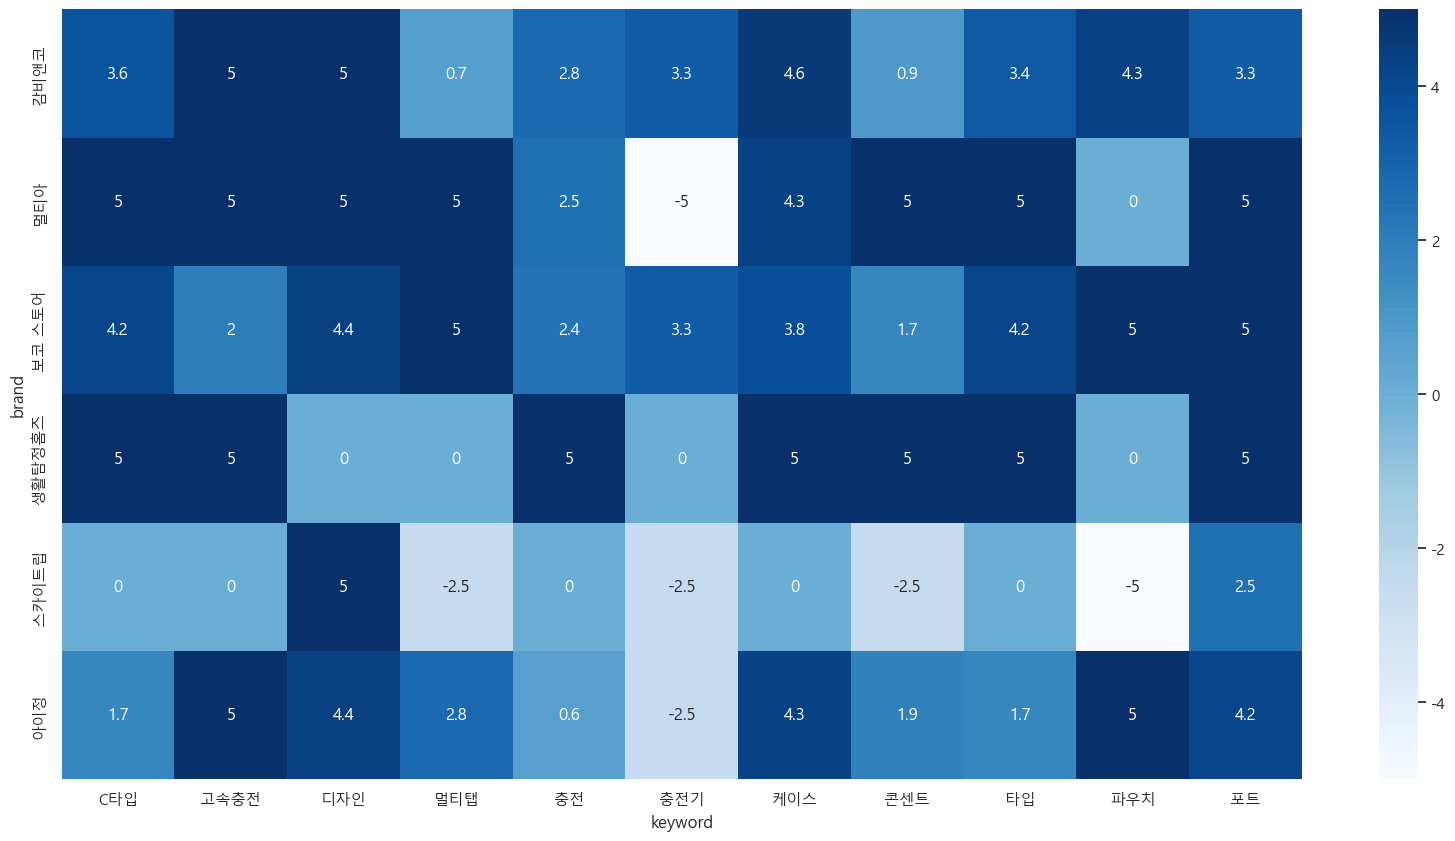

In [50]:
"""
# 전체 대상 결과 
brand_impact_topic(list_brand_topic_score(filtered_df, 
                       topic_lst=['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입'],
                       brands=brands_unique,
                       k=1
                       )[1],
                       is_annot=True
                       )
"""
# 부분 결과 예시 
brand_impact_topic(list_brand_topic_score(filtered_df, 
                       topic_lst=['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입'],
                       brands=['감비앤코','멀티아','보코 스토어','생활탐정홈즈','스카이트립','아이정'],
                       k=1
                       )[1],
                       is_annot=True,
                       fig_size_input = (20,10)
                       )

In [51]:
print(f'''
    어댑터의 sentiment 결과값은 아래와 같습니다.
    
    1. 브랜드들 통합 결과
    {list_brand_topic_score(filtered_df, 
                       topic_lst=['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입'],
                       k=1
                       )[0]}
    
    2. 브랜드 개별 결과
    {list_brand_topic_score(filtered_df, 
                       topic_lst=['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입'],
                       k=1
                       )[1]}       
        ''')


    어댑터의 sentiment 결과값은 아래와 같습니다.
    
    1. 브랜드들 통합 결과
                                                   brands keyword  \
0   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...      충전   
1   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...     케이스   
2   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...     디자인   
3   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...      포트   
4   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...     콘센트   
5   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...     파우치   
6   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...      타입   
7   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...    고속충전   
8   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...     멀티탭   
9   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...     충전기   
10  스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...     C타입   

    sentiment_norm_score  
0                    2.6  
1                    4.2  
2                    4.5  
3                    3.6  
4                    1

In [52]:
list_brand_topic_score(filtered_df, 
                       topic_lst=['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입'],
                       k=1
                       )[0]

,brands,keyword,sentiment_norm_score
0,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",충전,2.6
1,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",케이스,4.2
2,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",디자인,4.5
3,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",포트,3.6
4,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",콘센트,1.3
5,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",파우치,4.1
6,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",타입,3.1
7,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",고속충전,2.6
8,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",멀티탭,2.2
9,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",충전기,1.4


In [53]:
list_brand_topic_score(filtered_df, 
                       topic_lst=['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입'],
                       k=1
                       )[1]

,brand,keyword,sentiment_norm_score
0,스카이트립,충전,0.0
1,감비앤코,충전,2.8
2,지티스몰,충전,1.4
3,파워존 스토어,충전,1.7
4,UM2 COBY,충전,5.0
...,...,...,...
732,열몽,C타입,0.0
733,morac,C타입,0.0
734,가우넷,C타입,0.0
735,주파집,C타입,-0.7


### Test 과정 

In [54]:
#### 아래는 Test 내용 

test_list = ['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입']

keyword_sent_result = []

for i in test_list:
    var_name5 = f'{i}_sent'
    var_name6 = f'{i}_score'
    var_name7 = f'{i}_norm_score'

    #brand_filtered = general[general['brand_name'].contains('스카이트립')]

    globals()[var_name5] = general[general.tokenized_sentence.notna() & general.tokenized_sentence.str.contains(i)]

    if len(globals()[var_name5]) > 0:
        globals()[var_name6] = globals()[var_name5]['sentiment'].sum() / len(globals()[var_name5])
    else:
        globals()[var_name6] = 0
    
    # 5까지로 정규화
    globals()[var_name7] = round(globals()[var_name6]*5,1)
    
    # 결과 리스트에 append
    keyword_sent_result.append({"keyword": i, "sentiment_norm_score": globals()[var_name7]})

print(keyword_sent_result)

[{'keyword': '충전', 'sentiment_norm_score': 2.6}, {'keyword': '케이스', 'sentiment_norm_score': 4.2}, {'keyword': '디자인', 'sentiment_norm_score': 4.5}, {'keyword': '포트', 'sentiment_norm_score': 3.6}, {'keyword': '콘센트', 'sentiment_norm_score': 1.3}, {'keyword': '파우치', 'sentiment_norm_score': 4.1}, {'keyword': '타입', 'sentiment_norm_score': 3.1}, {'keyword': '고속충전', 'sentiment_norm_score': 2.6}, {'keyword': '멀티탭', 'sentiment_norm_score': 2.2}, {'keyword': '충전기', 'sentiment_norm_score': 1.4}, {'keyword': 'C타입', 'sentiment_norm_score': 3.1}]


In [55]:
#### 아래는 Test 내용 (Brand 추가)

test_list = ['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입']
brand_filter_list = ['스카이트립','감비앤코']

keyword_sent_result = []
brands_sent_result = []
brand_result = []

for i in test_list:
    var_name5 = f'{i}_sent'
    var_name6 = f'{i}_score'
    var_name7 = f'{i}_norm_score'

    # brand로 필터링
    brand_filtered = general[general['brand_name'].str.contains('|'.join(brand_filter_list))]

    globals()[var_name5] = brand_filtered[brand_filtered.tokenized_sentence.notna() & brand_filtered.tokenized_sentence.str.contains(i)]

    if len(globals()[var_name5]) > 0:
        globals()[var_name6] = globals()[var_name5]['sentiment'].sum() / len(globals()[var_name5])
    else:
        globals()[var_name6] = 0
    
    # 5까지로 정규화
    globals()[var_name7] = round(globals()[var_name6]*5,1)
    
    # 결과 리스트에 append
    keyword_sent_result.append({"keyword": i, "sentiment_norm_score": globals()[var_name7]})

    # 브랜드 결과 리스트에 append
    brands_sent_result.append({"brands": ', '.join(brand_filter_list), "keyword":i, "sentiment_norm_score": globals()[var_name7]})

    
    #### 브랜드 개별 값도 추가
    for j in brand_filter_list:
        var_name8 = f'{i}_{j}_brand_sent'
        var_name9 = f'{i}_{j}_brand_score'
        var_name10 = f'{i}_{j}_brand_norm_score'
        var_name11 = f'{j}_brand_df'

        globals()[var_name11] = general[general['brand_name'].str.contains(j)]
        globals()[var_name8] = globals()[var_name11][globals()[var_name11].tokenized_sentence.str.contains(i)]

        if len(globals()[var_name8]) > 0:
            globals()[var_name9] = globals()[var_name8]['sentiment'].sum() / len(globals()[var_name8])
        else:
            globals()[var_name9] = 0
        
        # 5까지로 정규화
        globals()[var_name10] = round(globals()[var_name9]*5,1)

        # 브랜드 결과 리스트에 append
        brand_result.append({"brand": j, "keyword": i, "sentiment_norm_score": globals()[var_name10]})

total_brands_result_df = pd.DataFrame(brands_sent_result)
diff_brands_result_df = pd.DataFrame(brand_result) 

In [56]:
# 전체 입력 브랜드 결과
total_brands_result_df

,brands,keyword,sentiment_norm_score
0,"스카이트립, 감비앤코",충전,2.3
1,"스카이트립, 감비앤코",케이스,4.6
2,"스카이트립, 감비앤코",디자인,5.0
3,"스카이트립, 감비앤코",포트,3.1
4,"스카이트립, 감비앤코",콘센트,0.0
5,"스카이트립, 감비앤코",파우치,3.9
6,"스카이트립, 감비앤코",타입,3.4
7,"스카이트립, 감비앤코",고속충전,5.0
8,"스카이트립, 감비앤코",멀티탭,0.0
9,"스카이트립, 감비앤코",충전기,1.0


In [57]:
# 입력 개별 브랜드 결과
diff_brands_result_df

,brand,keyword,sentiment_norm_score
0,스카이트립,충전,0.0
1,감비앤코,충전,2.8
2,스카이트립,케이스,0.0
3,감비앤코,케이스,4.6
4,스카이트립,디자인,5.0
5,감비앤코,디자인,5.0
6,스카이트립,포트,2.5
7,감비앤코,포트,3.3
8,스카이트립,콘센트,-2.5
9,감비앤코,콘센트,0.9


In [58]:
diff_brands_result_df.pivot(index='brand',columns='keyword', values='sentiment_norm_score')

keyword,C타입,고속충전,디자인,멀티탭,충전,충전기,케이스,콘센트,타입,파우치,포트
brand,,,,,,,,,,,
감비앤코,3.6,5.0,5.0,0.7,2.8,3.3,4.6,0.9,3.4,4.3,3.3
스카이트립,0.0,0.0,5.0,-2.5,0.0,-2.5,0.0,-2.5,0.0,-5.0,2.5


- 색상 변경시 해당 블로그 참조 : (https://wewegh.tistory.com/44)

<Axes: xlabel='keyword', ylabel='brand'>

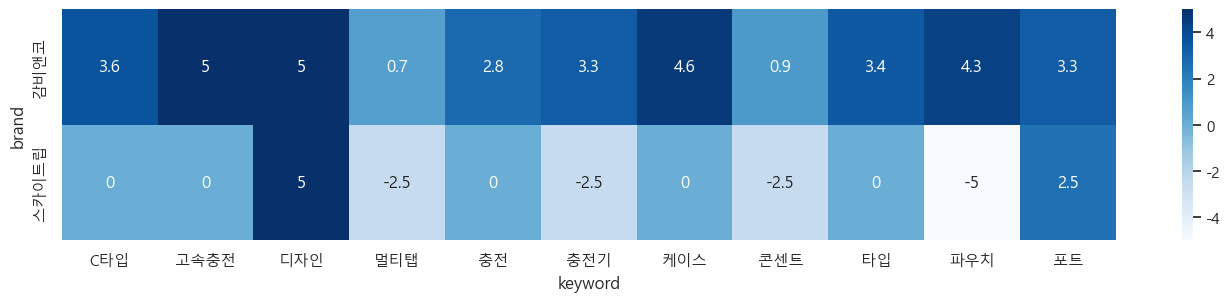

In [59]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')
ax = plt.subplots(figsize=(17,3))   # 입력 많이 받았을 땐 해당란 제외하는 것이 좋을 듯 
sns.heatmap(diff_brands_result_df.pivot(index='brand',columns='keyword', values='sentiment_norm_score'), 
            center=0, cmap='Blues', annot=True, fmt='.3g')

In [60]:
#충전_스카이트립_brand_sent

In [61]:
total_topic_sent_df = pd.DataFrame(keyword_sent_result)
total_topic_sent_df

,keyword,sentiment_norm_score
0,충전,2.3
1,케이스,4.6
2,디자인,5.0
3,포트,3.1
4,콘센트,0.0
5,파우치,3.9
6,타입,3.4
7,고속충전,5.0
8,멀티탭,0.0
9,충전기,1.0


<Axes: xlabel='keyword', ylabel='brand'>

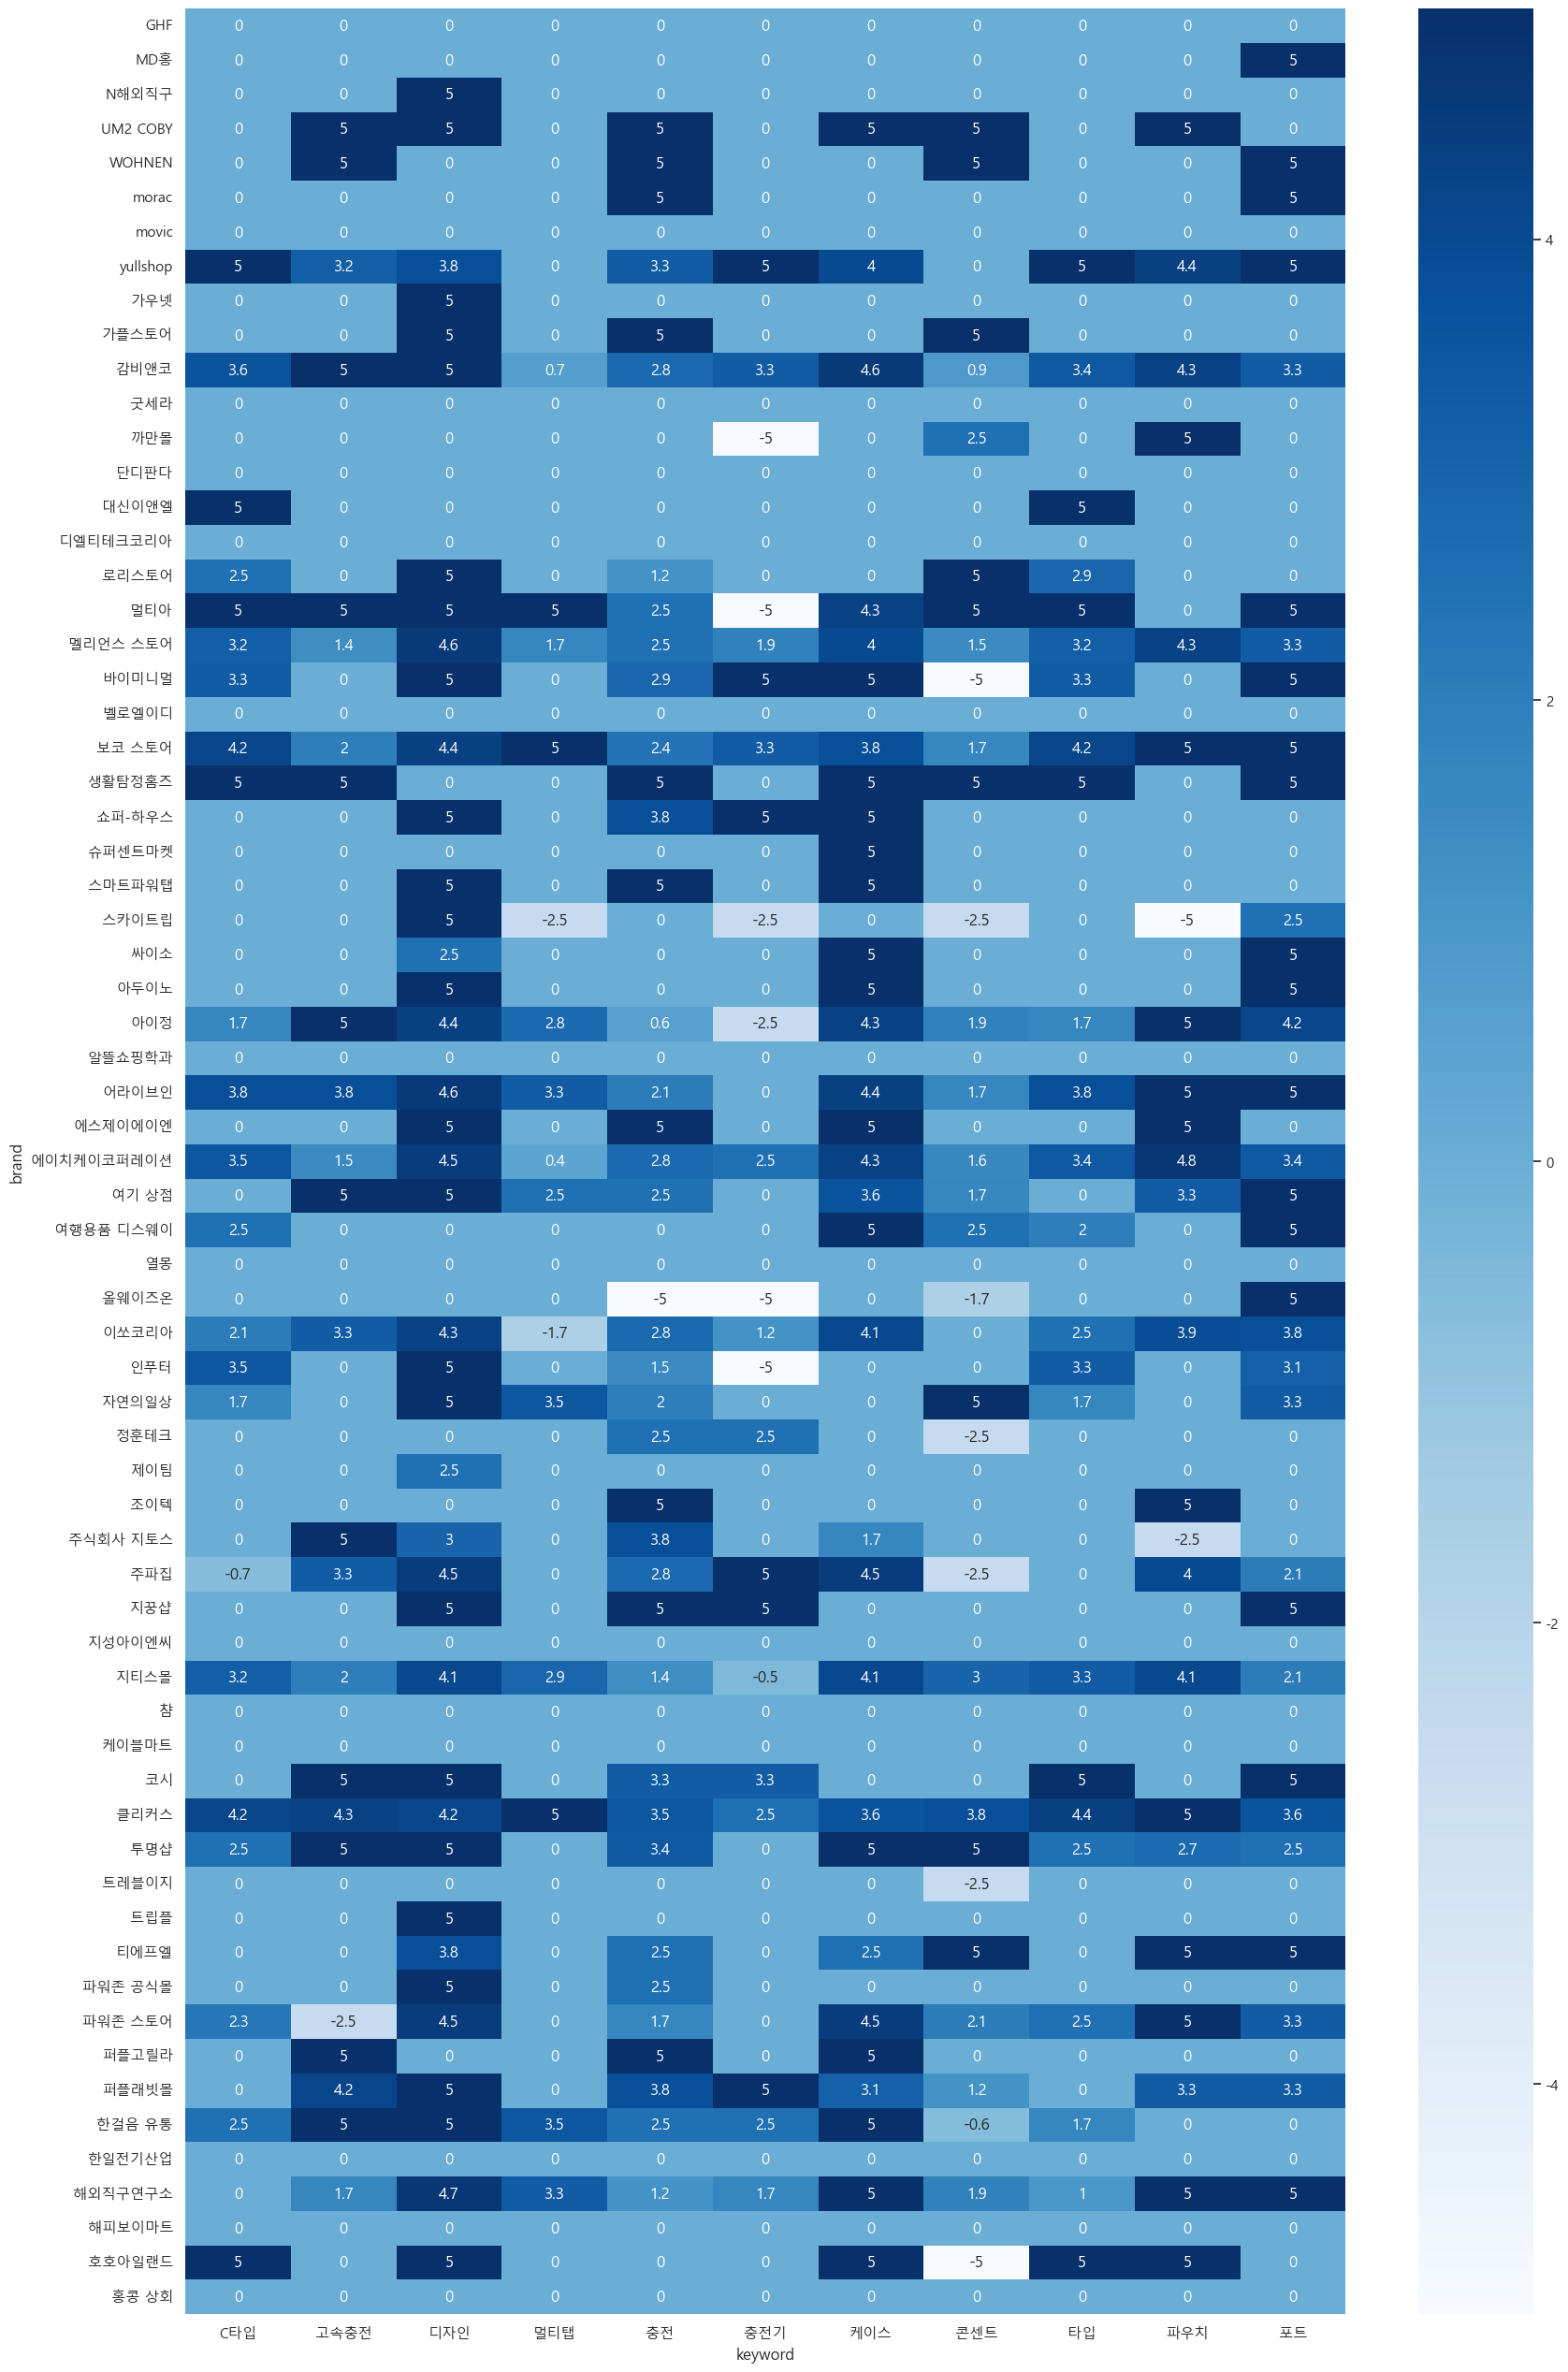

In [62]:
# 전체 대상 결과 
brand_impact_topic(list_brand_topic_score(filtered_df, 
                       topic_lst=['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입'],
                       brands=brands_unique,
                       k=1
                       )[1],
                       is_annot=True
                       )

### 부가 확인

In [63]:
# NaN 여부 확인
general[general['tokenized_sentence'].isna()]

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity,sentiment


In [64]:
general_2 = general.copy()

general_2['tokenized_sentence_len'] = general_2['tokenized_sentence'].apply(lambda x : len(x))
general_2[general_2['tokenized_sentence_len']==0]

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity,sentiment,tokenized_sentence_len
